<a href="https://colab.research.google.com/github/Heisnamba/Potfolio/blob/main/FIFA_WC_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **EDA FOR THE DATA**




## **1. Data Profiling:**

---

[link text](https://)
Here I examine the content, structure, and quality of data in order to gain an understanding of the data order to identify data anomalies, trends, patterns, and inconsistencies. Data profiling can also be used to check for the completeness and accuracy of data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation

In [2]:
# Reading of Raw dataset uploaded in GitHub
df1 = pd.read_csv('https://raw.githubusercontent.com/Heisnamba/Potfolio/main/FIFA%20WC/WorldCupMatches.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/Heisnamba/Potfolio/main/FIFA%20WC/WorldCupPlayers.csv')
df3 = pd.read_csv('https://raw.githubusercontent.com/Heisnamba/Potfolio/main/FIFA%20WC/WorldCups.csv')

In [3]:
df1.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [4]:
#There might be some error in the dataset that it has lots of NULL values. We need to remove it
df1.isnull().sum()

Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64

In [5]:
df1.shape

(4572, 20)

In [6]:
# Removing the empty rows 
WC_details = df1.dropna()

In [7]:
WC_details = WC_details.drop('Win conditions', axis =1)

In [8]:
WC_details.isnull().sum()

Year                    0
Datetime                0
Stage                   0
Stadium                 0
City                    0
Home Team Name          0
Home Team Goals         0
Away Team Goals         0
Away Team Name          0
Attendance              0
Half-time Home Goals    0
Half-time Away Goals    0
Referee                 0
Assistant 1             0
Assistant 2             0
RoundID                 0
MatchID                 0
Home Team Initials      0
Away Team Initials      0
dtype: int64

In [9]:
WC_details.shape

(850, 19)

In [10]:
df2.isnull().sum()

RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0
Player Name          0
Position         33641
Event            28715
dtype: int64

In [11]:
#Droping the Position and Event columns since it has lots of NULL values
WC_player = df2.drop(columns = ['Position','Event'])
WC_player.isnull().sum()

RoundID          0
MatchID          0
Team Initials    0
Coach Name       0
Line-up          0
Shirt Number     0
Player Name      0
dtype: int64

In [12]:
df3.isnull().sum()

Year              0
Country           0
Winner            0
Runners-Up        0
Third             0
Fourth            0
GoalsScored       0
QualifiedTeams    0
MatchesPlayed     0
Attendance        0
dtype: int64

In [13]:
WC_cup = df3
WC_cup.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [14]:
#Checking the details of Final Stage for WC_details
WC_details[WC_details['Stage'] =='Final']

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
17,1930.0,30 Jul 1930 - 14:15,Final,Estadio Centenario,Montevideo,Uruguay,4.0,2.0,Argentina,68346.0,1.0,2.0,LANGENUS Jean (BEL),SAUCEDO Ulises (BOL),CRISTOPHE Henry (BEL),405.0,1087.0,URU,ARG
34,1934.0,10 Jun 1934 - 17:30,Final,Nazionale PNF,Rome,Italy,2.0,1.0,Czechoslovakia,55000.0,0.0,0.0,EKLIND Ivan (SWE),BAERT Louis (BEL),IVANCSICS Mihaly (HUN),3490.0,1134.0,ITA,TCH
52,1938.0,19 Jun 1938 - 17:00,Final,Stade Olympique,Colombes,Italy,4.0,2.0,Hungary,45000.0,3.0,1.0,CAPDEVILLE Georges (FRA),WUETHRICH Hans (SUI),KRIST Gustav (TCH),3487.0,1174.0,ITA,HUN
100,1954.0,04 Jul 1954 - 17:00,Final,Wankdorf Stadium,Berne,Germany FR,3.0,2.0,Hungary,62500.0,2.0,2.0,LING William (ENG),ORLANDINI Vincenzo (ITA),GRIFFITHS Benjamin (WAL),3484.0,1278.0,FRG,HUN
135,1958.0,29 Jun 1958 - 15:00,Final,Rasunda Stadium,Solna,Brazil,5.0,2.0,Sweden,49737.0,2.0,1.0,GUIGUE Maurice (FRA),DUSCH Albert (GER),GARDEAZABAL Juan (ESP),3482.0,1343.0,BRA,SWE
167,1962.0,17 Jun 1962 - 14:30,Final,Nacional,Santiago De Chile,Brazil,3.0,1.0,Czechoslovakia,68679.0,1.0,1.0,LATYCHEV Nikolaj (URS),HORN Leo (NED),DAVIDSON Bob (SCO),3480.0,1463.0,BRA,TCH
199,1966.0,30 Jul 1966 - 15:00,Final,Wembley Stadium,London,England,4.0,2.0,Germany FR,96924.0,0.0,0.0,DIENST Gottfried (SUI),BAKHRAMOV Tofik (URS),GALBA Karol (TCH),3478.0,1633.0,ENG,FRG
231,1970.0,21 Jun 1970 - 12:00,Final,Estadio Azteca,Mexico City,Brazil,4.0,1.0,Italy,107412.0,1.0,1.0,GLOECKNER Rudolf (GDR),SCHEURER Ruedi (SUI),COEREZZA Norberto Angel (ARG),3476.0,1765.0,BRA,ITA
269,1974.0,07 July 1974 - 16:00,Final,Olympiastadion,Munich,Netherlands,1.0,2.0,Germany FR,78200.0,1.0,2.0,TAYLOR John (ENG),GONZALEZ ARCHUNDIA Alfonso (MEX),BARRETO RUIZ Ramon (URU),605.0,2063.0,NED,FRG
307,1978.0,25 Jun 1978 - 15:00,Final,El Monumental - Estadio Monumental Antonio Ves...,Buenos Aires,Argentina,3.0,1.0,Netherlands,71483.0,0.0,0.0,GONELLA Sergio (ITA),BARRETO RUIZ Ramon (URU),LINEMAYR Erich (AUT),639.0,2198.0,ARG,NED


In [15]:
#Droping Attendance from WC_cup since it is irrelevant
WC_cup = WC_cup.drop('Attendance', axis = 1)

In [16]:
WC_details.columns

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name', 'Attendance',
       'Half-time Home Goals', 'Half-time Away Goals', 'Referee',
       'Assistant 1', 'Assistant 2', 'RoundID', 'MatchID',
       'Home Team Initials', 'Away Team Initials'],
      dtype='object')

In [17]:
Attendance = list(WC_details[WC_details['Stage'] == 'Final']['Attendance'])
Attendance

[68346.0,
 55000.0,
 45000.0,
 62500.0,
 49737.0,
 68679.0,
 96924.0,
 107412.0,
 78200.0,
 71483.0,
 90000.0,
 114600.0,
 73603.0,
 94194.0,
 80000.0,
 69029.0,
 69000.0,
 84490.0,
 74738.0,
 74738.0]

In [18]:
# Swapping values of Attendance from WC_deatils to WC_cup
WC_cup['Attendance'] = Attendance

In [19]:
WC_cup

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,68346.0
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,55000.0
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,45000.0
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,62500.0
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,49737.0
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,68679.0
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,96924.0
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,107412.0
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,78200.0
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,71483.0


# **2. Analysing data to gain insights**





### **WC_cup data**
1. Which Country won the most

2. Total goals scored by each country

3. Total number of matches played

4. Average goals scored by each country

5. Which country played the most Final

In [69]:
WC_cup.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,68346.0
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,55000.0
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,45000.0
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,62500.0
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,49737.0


In [70]:
#Which country took the World Cup most?
total_win = WC_cup.Winner.value_counts()
total_win

Brazil        5
Italy         4
Germany FR    3
Uruguay       2
Argentina     2
England       1
France        1
Spain         1
Germany       1
Name: Winner, dtype: int64

In [71]:
# Number of goals by each country
Each_country_goal = WC_cup.groupby('Country')['GoalsScored'].sum()
Each_country_goal

Country
Argentina       102
Brazil          259
Chile            89
England          89
France          255
Germany         244
Italy           185
Korea/Japan     161
Mexico          227
South Africa    145
Spain           146
Sweden          126
Switzerland     140
USA             141
Uruguay          70
Name: GoalsScored, dtype: int64

In [72]:
#Maximum goal score
Each_country_goal.max()

259

In [73]:
#Maximun goal scored country
Each_country_goal.idxmax()

'Brazil'

In [74]:
# Total number of Matches played 
Country_matches = WC_cup.groupby('Country')['MatchesPlayed'].sum()
Country_matches

Country
Argentina        38
Brazil           86
Chile            32
England          32
France           82
Germany         102
Italy            69
Korea/Japan      64
Mexico           84
South Africa     64
Spain            52
Sweden           35
Switzerland      26
USA              52
Uruguay          18
Name: MatchesPlayed, dtype: int64

In [75]:
#Average goals scored by each country
Avg_country_goal = Each_country_goal/Country_matches
Avg_country_goal

Country
Argentina       2.684211
Brazil          3.011628
Chile           2.781250
England         2.781250
France          3.109756
Germany         2.392157
Italy           2.681159
Korea/Japan     2.515625
Mexico          2.702381
South Africa    2.265625
Spain           2.807692
Sweden          3.600000
Switzerland     5.384615
USA             2.711538
Uruguay         3.888889
dtype: float64

In [76]:
# Which country played the most final
country_final= WC_cup['Winner'].append(WC_cup['Runners-Up']).value_counts()
print(country_final)

Brazil            7
Italy             6
Germany FR        6
Argentina         5
Netherlands       3
Uruguay           2
France            2
Germany           2
Czechoslovakia    2
Hungary           2
England           1
Spain             1
Sweden            1
dtype: int64


<ipython-input-76-728c3b106f93>:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  country_final= WC_cup['Winner'].append(WC_cup['Runners-Up']).value_counts()


"Germany FR" refers to the unified German team that competed in the 1990 and 1994 World Cups, while "Germany" refers to the separate teams of East Germany and West Germany that competed in the World Cup from 1954 to 1990.

In [77]:
country_final['Germany'] = country_final['Germany'] + country_final['Germany FR'] 
country_final = country_final.drop('Germany FR')


In [78]:
country_final.sort_values(ascending=False)

Germany           8
Brazil            7
Italy             6
Argentina         5
Netherlands       3
Uruguay           2
France            2
Czechoslovakia    2
Hungary           2
England           1
Spain             1
Sweden            1
dtype: int64

### **WC_details**
1. Goal scored as Away Team

2. Goal scored as Home Team

3. Performance of Country in each Stages

4. Total numbers of Games played

5. Total number of participants in each year

6. Number of Attendees in the World Cup each year

In [79]:
WC_details.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [80]:
#Check for duplicates and remove if any
WC_details[WC_details.duplicated()]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials


In [81]:
WC_details = WC_details.drop_duplicates()

In [82]:
# Droping some columns which are unnecessary
WCD = WC_details.drop(columns = ['Datetime', 'Home Team Initials', 'Away Team Initials', 'Stadium', 'City', 'Assistant 1', 'Assistant 2' ])


In [83]:
WCD.sample(n = 5)

,Year,Stage,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,RoundID,MatchID
304,1978.0,Group B,Brazil,3.0,1.0,Poland,39586.0,1.0,1.0,SILVAGNO CAVANNA Juan (CHI),279.0,2252.0
563,1998.0,Group G,Colombia,0.0,2.0,England,38100.0,0.0,2.0,BRIZIO CARTER Arturo (MEX),1014.0,8770.0
31,1934.0,Semi-finals,Italy,1.0,0.0,Austria,35000.0,1.0,0.0,EKLIND Ivan (SWE),3492.0,1107.0
83,1954.0,Group 3,Uruguay,7.0,0.0,Scotland,34000.0,2.0,0.0,ORLANDINI Vincenzo (ITA),211.0,1313.0
53,1950.0,Group 1,Brazil,4.0,0.0,Mexico,81649.0,1.0,0.0,READER George (ENG),208.0,1187.0


In [84]:
# Away Team Goals
WC_away_goals = WCD[['Away Team Name', 'Away Team Goals']]

# Group by Away Team Name and sum the Goals
away_goals_scored = WC_away_goals.groupby('Away Team Name')['Away Team Goals'].sum().reset_index()

In [85]:
away_goals_scored = away_goals_scored.sort_values(by = 'Away Team Goals', ascending = False)

In [86]:
# Home Team Goals
WC_home_goals = WCD[['Home Team Name', 'Home Team Goals']]

# Group by Away Team Name and sum the Goals
home_goals_scored = WC_home_goals.groupby('Home Team Name')['Home Team Goals'].sum().reset_index()

In [87]:
home_goals_scored = home_goals_scored.sort_values(by = 'Home Team Goals', ascending = False)

**Performance of each Country in every Stage**

---

This can be done by grouping the data by the Home Team Name and the Stage, and then summing the Home Team Goals and Away Team Goals for each group. This will provide the total goals scored by each Home Team in a particular stage. The performance of each country can then be calculated by dividing the total goals scored by the total goals conceded.


In [88]:
# Create a new dataframe with the required columns
df_performance = WCD[['Year', 'Stage', 'Home Team Name', 'Home Team Goals', 'Away Team Name', 'Away Team Goals']].copy()

# Group data by Stage and Team
df_performance = df_performance.groupby(['Year', 'Stage', 'Home Team Name', 'Away Team Name']).sum()

In [89]:
df_performance.head()

Home Team Goals  Away Team Goals
Year   Stage   Home Team Name Away Team Name                                  
1930.0 Final   Uruguay        Argentina                   4.0              2.0
       Group 1 Argentina      Chile                       3.0              1.0
                              France                      1.0              0.0
                              Mexico                      6.0              3.0
               Chile          France                      1.0              0.0

In [90]:
# Calculate the win/lose/draw counts for each country
df_performance['Home_win'] = np.where(df_performance['Home Team Goals'] > df_performance['Away Team Goals'], 1, 0)
df_performance['Home_lose'] = np.where(df_performance['Home Team Goals'] < df_performance['Away Team Goals'], 1, 0)
df_performance['Home_draw'] = np.where(df_performance['Home Team Goals'] == df_performance['Away Team Goals'], 1, 0)

In [91]:
# Calculate the total games played
df_performance['Home_games'] = df_performance['Home_win'] + df_performance['Home_lose'] + df_performance['Home_draw']

In [92]:
df_performance

Home Team Goals  \
Year   Stage       Home Team Name Away Team Name                    
1930.0 Final       Uruguay        Argentina                   4.0   
       Group 1     Argentina      Chile                       3.0   
                                  France                      1.0   
                                  Mexico                      6.0   
                   Chile          France                      1.0   
...                                                           ...   
2014.0 Round of 16 Costa Rica     Greece                      1.0   
                   France         Nigeria                     2.0   
                   Netherlands    Mexico                      2.0   
       Semi-finals Brazil         Germany                     1.0   
                   Netherlands    Argentina                   0.0   

                                                  Away Team Goals  Home_win  \
Year   Stage       Home Team Name Away Team Name                              
1930.0 Final       Uruguay        Argentina                   2.0         1   
       Group 1     Argentina      Chile                       1.0         1   
                                  France                      0.0         1   
                                  Mexico                      3.0         1   
                   Chile          France                      0.0         1   
...                                                           ...       ...   
2014.0 Round of 16 Costa Rica     Greece                      1.0         0   
                   France         Nigeria                     0.0         1   
                   Netherlands    Mexico                      1.0         1   
       Semi-finals Brazil         Germany                     7.0         0   
                   Netherlands    Argentina                   0.0         0   

                                                  Home_lose  Home_draw  \
Year   Stage       Home Team Name Away Team Name                         
1930.0 Final       Uruguay        Argentina               0          0   
       Group 1     Argentina      Chile                   0          0   
                                  France                  0          0   
                                  Mexico                  0          0   
                   Chile          France                  0          0   
...                                                     ...        ...   
2014.0 Round of 16 Costa Rica     Greece                  0          1   
                   France         Nigeria                 0          0   
                   Netherlands    Mexico                  0          0   
       Semi-finals Brazil         Germany                 1          0   
                   Netherlands    Argentina               0          1   

                                                  Home_games  
Year   Stage       Home Team Name Away Team Name              
1930.0 Final       Uruguay        Argentina                1  
       Group 1     Argentina      Chile                    1  
                                  France                   1  
                                  Mexico                   1  
                   Chile          France                   1  
...                                                      ...  
2014.0 Round of 16 Costa Rica     Greece                   1  
                   France         Nigeria                  1  
                   Netherlands    Mexico                   1  
       Semi-finals Brazil         Germany                  1  
                   Netherlands    Argentina                1  

[827 rows x 6 columns]

In [93]:
# Number of Country Participated in each World Cup
Participants = WCD.groupby('Year')['Home Team Name'].count()

In [94]:
Participants

Year
1930.0    18
1934.0    17
1938.0    18
1950.0    22
1954.0    26
1958.0    35
1962.0    32
1966.0    32
1970.0    32
1974.0    38
1978.0    38
1982.0    52
1986.0    52
1990.0    52
1994.0    52
1998.0    64
2002.0    64
2006.0    64
2010.0    64
2014.0    63
Name: Home Team Name, dtype: int64

In [95]:
# Total number of Attendees for each World Cup
Fans = WCD.groupby('Year')['Attendance'].sum()

In [96]:
Fans

Year
1930.0     590549.0
1934.0     363000.0
1938.0     375700.0
1950.0    1045246.0
1954.0     768607.0
1958.0     819810.0
1962.0     893172.0
1966.0    1563135.0
1970.0    1603975.0
1974.0    1865753.0
1978.0    1545791.0
1982.0    2109723.0
1986.0    2394031.0
1990.0    2516215.0
1994.0    3587538.0
1998.0    2785100.0
2002.0    2705197.0
2006.0    3359439.0
2010.0    3178856.0
2014.0    3386810.0
Name: Attendance, dtype: float64

### **WC_player**

1. Players who represent their country the most in World Cup

2. Details of the palyers

In [97]:
WC_player

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI
...,...,...,...,...,...,...,...
37779,255959,300186501,ARG,SABELLA Alejandro (ARG),N,19,ALVAREZ
37780,255959,300186501,GER,LOEW Joachim (GER),N,6,KHEDIRA
37781,255959,300186501,ARG,SABELLA Alejandro (ARG),N,20,AGUERO
37782,255959,300186501,GER,LOEW Joachim (GER),N,21,MUSTAFI


In [98]:
WC_player.columns


Index(['RoundID', 'MatchID', 'Team Initials', 'Coach Name', 'Line-up',
       'Shirt Number', 'Player Name'],
      dtype='object')

In [99]:
# Top 10 players who represent their country the most in World Cup
df_count = WC_player.groupby(['Team Initials', 'Player Name']).size().reset_index(name='count')

In [100]:
df_count.head(5)

,Team Initials,Player Name,count
0,ALG,ABDOUN,3
1,ALG,Abdelhamid SADMI,3
2,ALG,Abdelkader HORR,3
3,ALG,Abdellah MEDJADI,3
4,ALG,Abdelmajid BOUREBBOU,3


In [101]:
max_count = df_count.groupby(['Team Initials'])['count'].max().to_dict()

In [102]:
top10 = dict(sorted(max_count.items(), key=lambda x: x[1], reverse=True)[:10])

In [103]:
top10

{'GER': 32,
 'BRA': 28,
 'FRG': 25,
 'POL': 24,
 'ARG': 23,
 'ITA': 23,
 'NED': 22,
 'ESP': 19,
 'URS': 19,
 'ENG': 18}

In [104]:
# Details of the top players who represent their country the most in World Cup
df_player = pd.DataFrame(columns=df_count.columns)
max = df_count.groupby(['Team Initials'])['count'].max()
max10 = sorted(max_count.items(), key=lambda x: x[1], reverse=True)[:10]

In [105]:
for team, max in max10:
    df_temp = df_count[(df_count['Team Initials'] == team) & (df_count['count'] == max)]
    df_player = df_player.append(df_temp)


<ipython-input-105-11e45fdca905>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_player = df_player.append(df_temp)
<ipython-input-105-11e45fdca905>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_player = df_player.append(df_temp)
<ipython-input-105-11e45fdca905>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_player = df_player.append(df_temp)
<ipython-input-105-11e45fdca905>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_player = df_player.append(df_temp)
<ipython-input-105-11e45fdca905>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

In [106]:
df_player

,Team Initials,Player Name,count
3131,GER,KLOSE,32
1083,BRA,OSCAR,28
3010,FRG,Sepp MAIER,25
5585,POL,Wladyslaw ZMUDA,24
173,ARG,Diego MARADONA,23
3841,ITA,Dino ZOFF,23
3910,ITA,Giuseppe BERGOMI,23
4901,NED,KUYT,22
4934,NED,ROBBEN,22
4947,NED,SNEIJDER,22


# **2. Visualization**

---

### **WC_Cup**

In [58]:
fields = Country_matches.index
index = np.arange(len(fields))

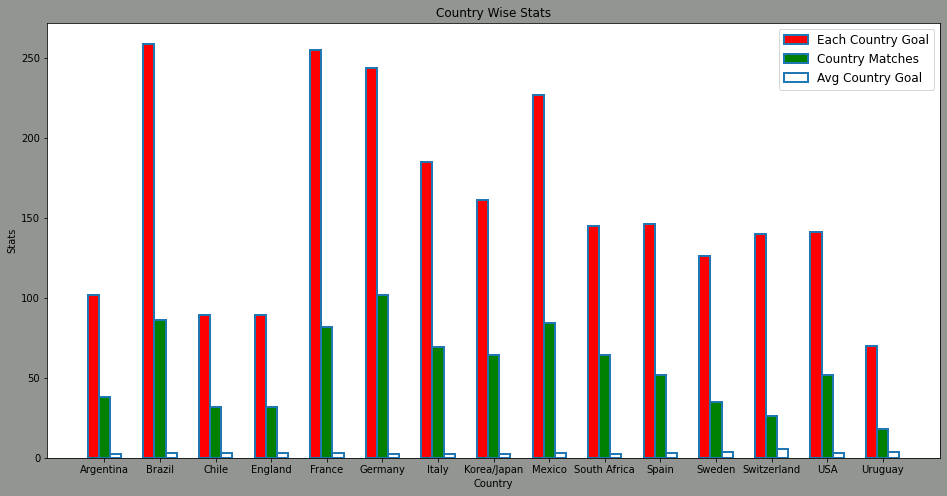

In [59]:
figure = plt.figure(figsize = (16,8))
figure.set_facecolor('#929591')
plt.bar(index, Each_country_goal, width = 0.2, color = 'r', edgecolor = '#1f77b4', linewidth = 2) 
plt.bar(index + 0.2, Country_matches, width = 0.2, color = 'g', edgecolor = '#1f77b4', linewidth = 2)
plt.bar(index +0.4, Avg_country_goal, width = 0.2, color = 'w', edgecolor = '#1f77b4', linewidth = 2)
plt.xticks(index + 0.2, fields)

plt.title("Country Wise Stats")                         
plt.legend(['Each Country Goal', 'Country Matches', 'Avg Country Goal'], loc='best', fontsize = 'large')
plt.xlabel('Country')                                                
plt.ylabel('Stats')                                              

plt.show()


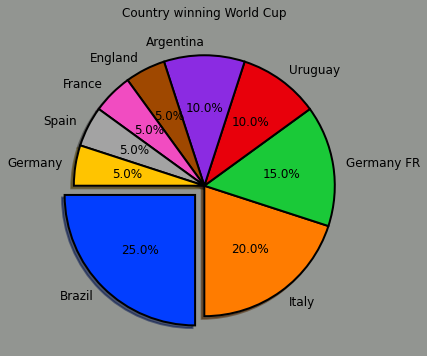

In [60]:
figure = plt.figure(figsize = (12,6))
figure.set_facecolor('#929591') # Change the background color
plt.pie(total_win, labels = total_win.index, explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0] #0.1 determinies the explode distance
       , colors = sns.color_palette('bright'), autopct = '%0.1f%%'
       , shadow = True ,startangle = 180
       , textprops = {'fontsize':12}
       , wedgeprops = {'linewidth':2,'width':1,'edgecolor':'k'})  # try changing the width to 0.5    
plt.title('Country winning World Cup')
plt.show()

### **WC_details**

In [61]:
top10_home_goals = home_goals_scored.head(10)
index1 = top10_home_goals['Home Team Name']
data= top10_home_goals['Home Team Goals']

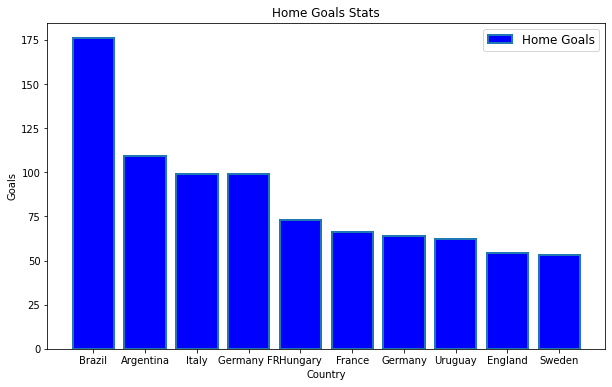

In [62]:
plt.figure(figsize = (10,6))
plt.bar(index1, data, color = 'blue', edgecolor = '#1f77b4', linewidth = 2) 
plt.title("Home Goals Stats")                         
plt.legend(['Home Goals'], loc='best', fontsize = 'large')
plt.xlabel('Country')                                                
plt.ylabel('Goals')
plt.show()

In [63]:
top10_away_scored = away_goals_scored.head(10)

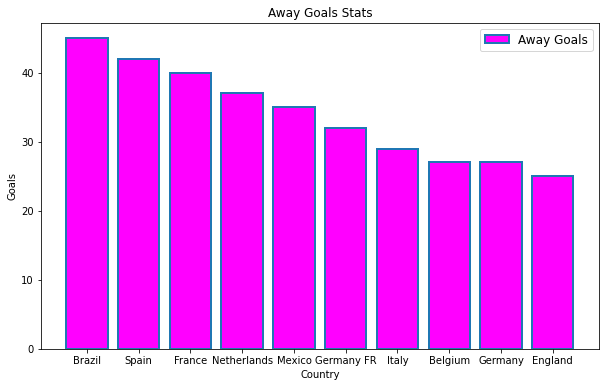

In [64]:
plt.figure(figsize = (10,6))
plt.bar(top10_away_scored['Away Team Name'], top10_away_scored['Away Team Goals'], color = 'magenta', edgecolor = '#1f77b4', linewidth = 2) 
plt.title("Away Goals Stats")                         
plt.legend(['Away Goals'], loc='best', fontsize = 'large')
plt.xlabel('Country')                                                
plt.ylabel('Goals')
plt.show()

In [65]:
Participants.index

Float64Index([1930.0, 1934.0, 1938.0, 1950.0, 1954.0, 1958.0, 1962.0, 1966.0,
              1970.0, 1974.0, 1978.0, 1982.0, 1986.0, 1990.0, 1994.0, 1998.0,
              2002.0, 2006.0, 2010.0, 2014.0],
             dtype='float64', name='Year')

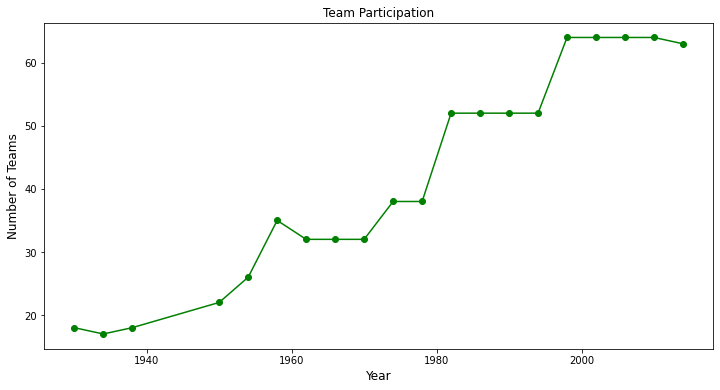

In [66]:
plt.figure(figsize = (12,6))
plt.plot(Participants.index, Participants, color = 'g', marker = 'o')
plt.title('Team Participation')
#plt.axis([min(Participants.index), max(Participants.index), 0, max(Participants)])
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Number of Teams', fontsize = 12)
plt.show()

In [67]:
Fans.index

Float64Index([1930.0, 1934.0, 1938.0, 1950.0, 1954.0, 1958.0, 1962.0, 1966.0,
              1970.0, 1974.0, 1978.0, 1982.0, 1986.0, 1990.0, 1994.0, 1998.0,
              2002.0, 2006.0, 2010.0, 2014.0],
             dtype='float64', name='Year')

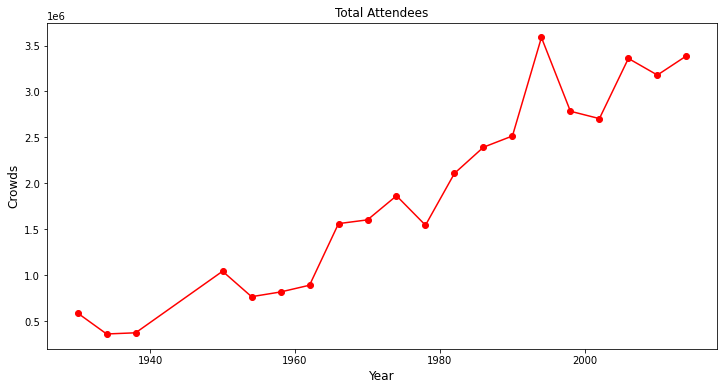

In [68]:
plt.figure(figsize = (12,6))
plt.plot(Fans.index, Fans, color = 'r', marker = 'o')
plt.title('Total Attendees')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Crowds', fontsize = 12)
plt.show()

### **WC_player**

In [107]:
df_player

,Team Initials,Player Name,count
3131,GER,KLOSE,32
1083,BRA,OSCAR,28
3010,FRG,Sepp MAIER,25
5585,POL,Wladyslaw ZMUDA,24
173,ARG,Diego MARADONA,23
3841,ITA,Dino ZOFF,23
3910,ITA,Giuseppe BERGOMI,23
4901,NED,KUYT,22
4934,NED,ROBBEN,22
4947,NED,SNEIJDER,22


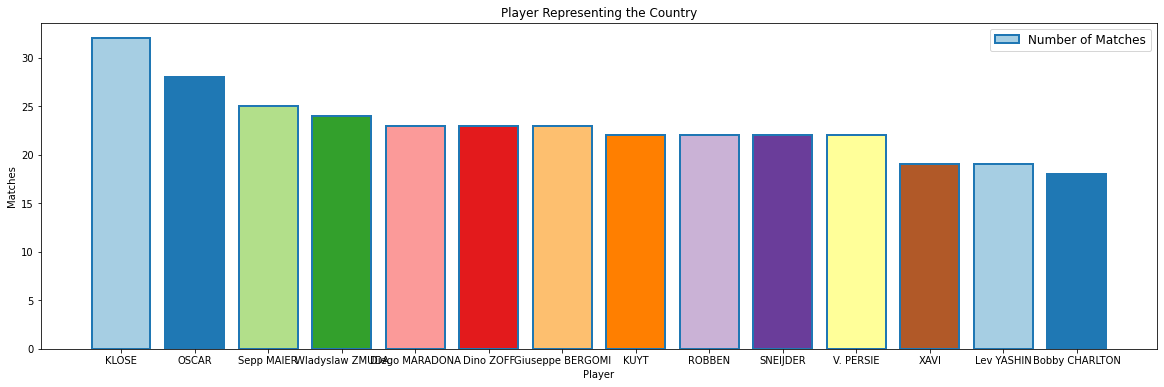

In [118]:
plt.figure(figsize = (20,6))
plt.bar(df_player['Player Name'], df_player['count'], color = sns.color_palette("Paired"), edgecolor = '#1f77b4', linewidth = 2) 
plt.title("Player Representing the Country")                         
plt.legend(['Number of Matches'], loc='best', fontsize = 'large')
plt.xlabel('Player')                                                
plt.ylabel('Matches')
plt.show()

In [111]:
# import re

# # Create a list to store the capital letter data
# capital_letter_data = []

# # Iterate through each row
# for index, row in df_player.iterrows():
#     # Extract the data in the specified column
#     data = row['Player Name']
#     # Use regular expressions to extract the capital letters
#     capital_letters = re.findall(r'[A-Z]', data)
#     # Append the extracted capital letters to the list
#     capital_letter_data.append(capital_letters)

# # Add the data to the dataframe
# df_player['Player'] = capital_letter_data